In [10]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#data = Path('./Resources/combined_data.csv')
data = Path('./Resources/topfive_lepidoptera.csv')
df = pd.read_csv(data)
df.head()

,order_name,family_name,datetime,individuals,tempmax,tempmin,temp_daily,humidity
0,LEPIDOPTERA,GEOMETRIDAE,1995-06-25,4,77.1,56.0,67.4,60.0
1,LEPIDOPTERA,GEOMETRIDAE,1995-06-27,3,69.9,57.3,63.7,54.5
2,LEPIDOPTERA,GEOMETRIDAE,2006-07-20,1,82.4,66.1,73.8,68.3
3,LEPIDOPTERA,GEOMETRIDAE,2006-06-13,1,79.6,59.9,71.1,55.6
4,LEPIDOPTERA,GEOMETRIDAE,1995-07-17,1,71.5,59.1,65.1,73.8


In [11]:
y = df["individuals"]
X = df.loc[:,["tempmax"]]

In [20]:
X.shape

(27251, 1)

In [12]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

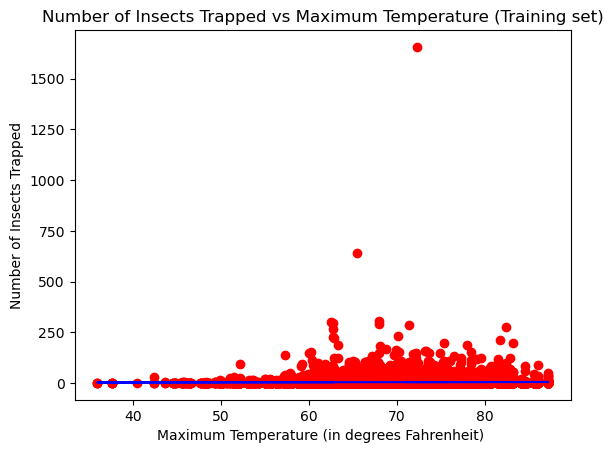

In [13]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Maximum Temperature (Training set)')
plt.xlabel('Maximum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [7]:
print(classifier.coef_)
print(classifier.intercept_)

[0.04695141]
1.4672476167109596


In [14]:
predictions = classifier.predict(X_test)

In [16]:
predictions[:20]

array([5.18110405, 4.84305391, 4.91817616, 4.59421144, 5.29378743,
       5.01207898, 5.19988462, 4.65524827, 4.15756334, 4.66463856,
       5.03085954, 4.4862232 , 5.09659152, 4.90409074, 5.22336032,
       4.33128355, 4.2561613 , 5.06372553, 4.60360172, 4.99329842])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error (y_test,predictions)

269.7782496680924

In [18]:
r2_score(np.array(y_test),predictions)

0.0009016521724077853

In [13]:
y = df["individuals"]
X = df.loc[:,["tempmin"]]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(20438, 1)

In [15]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

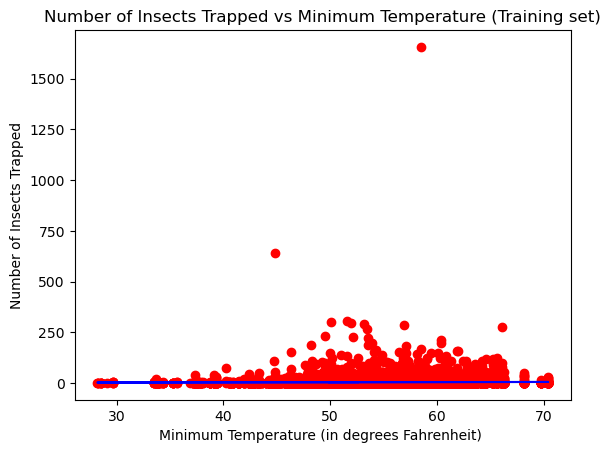

In [16]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Minimum Temperature (Training set)')
plt.xlabel('Minimum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [17]:
y = df["individuals"]
X = df.loc[:,["temp_daily"]]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(20438, 1)

In [19]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

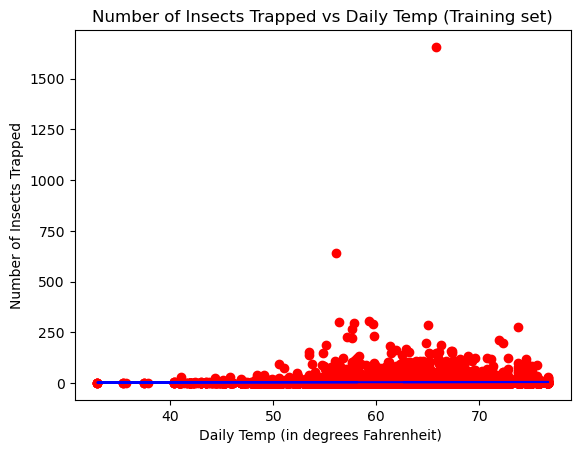

In [20]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Daily Temp (Training set)')
plt.xlabel('Daily Temp (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [21]:
y = df["individuals"]
X = df.loc[:,["humidity"]]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(20438, 1)

In [23]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

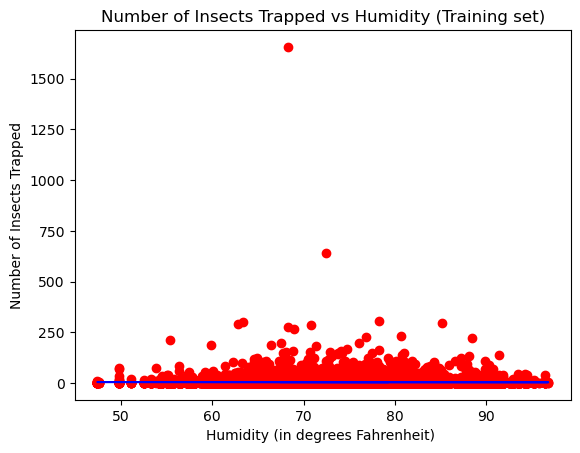

In [24]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Humidity (Training set)')
plt.xlabel('Humidity (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [25]:
# Segment the features from the target
y = df["individuals"]
X = df.drop(columns=["order_name", "family_name", "datetime", "individuals", "tempmax","tempmin"])

In [26]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape

(21800, 2)

In [27]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [28]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,4
1,1,1
2,1,2
3,1,5
4,1,1


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4936708860759494

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2691,    0,    0, ...,    0,    0,    0],
       [ 884,    0,    0, ...,    0,    0,    0],
       [ 444,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      1.00      0.66      2691
           2       0.00      0.00      0.00       884
           3       0.00      0.00      0.00       444
           4       0.00      0.00      0.00       279
           5       0.00      0.00      0.00       218
           6       0.00      0.00      0.00       147
           7       0.00      0.00      0.00       126
           8       0.00      0.00      0.00        81
           9       0.00      0.00      0.00        54
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        46
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00        24
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00        23
          18       0.00    

c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif